In [1]:
!TZ=US/Eastern date

Sat Apr 12 22:45:08 EDT 2025


In [2]:
!pwd
!echo $CONDA_PREFIX
!python -V

/ocean/projects/cis240078p/shared/analysis/D1F
/opt/packages/anaconda3-2024.10-1
Python 3.12.7


In [3]:
import os
PD = os.environ['SHARED']

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
INPUT_FILE1 = PD + '/data/Maybridge_HitDiscover.smiles.unique.v2.csv'
INPUT_FILE2 = 'maybridge.predictions.by.D1F.models.all.batch'

OUTPUT_FILE1 = 'maybridge.predictions.by.D1F.models.all.csv'
OUTPUT_FILE2 = 'maybridge.predictions.by.D1F.models.all.mean.csv'
OUTPUT_FILE3 = 'maybridge.predictions.by.D1F.models.all.mean.hist.png'

In [5]:
metadata = pd.read_csv(INPUT_FILE1, index_col=0)
metadata

,Code,SMILES
0,AC10018,FC1=CC=C(C=C1)C(C2=CC=C(F)C=C2)N3CCNCC3
1,AC12157,NC1=NC(N=CN2)=C2C(SC)=N1
2,AC13917,CN(C)CC1=CNC2=C1C=C(C=C2)OCC3=CC=CC=C3
3,AC27191,O=C(O)C1=CC=C(Br)O1
4,AC29806,O=C(O)C(N)CC1=CNC2=C1C=C(Br)C=C2
...,...,...
51770,S14814,O=[N+]([O-])C1=C(O/N=C(C)/OCC)C=CC([N+]([O-])=...
51771,S14839,O=C(N1OC2=CC=C([N+]([O-])=O)C([N+]([O-])=O)=C2...
51772,S14896,O=[N+]([O-])C1=CC=C2N=C(C3=CC=CC=C3)C(C4=CC=CC...
51773,SPB05721,CC(N1)=C(C(OCC)=O)C(/C=C/C2=CC=CC=C2)C(C(OCC)=...


In [6]:
!ls *.csv | wc

    128     128    6674


In [7]:
pred = []
for i in range(128):
    #if i == 10: continue
    pred.append(pd.read_csv(INPUT_FILE2+str(i)+'.csv'))

In [8]:
len(pred), set([x.shape for x in pred])

(128, {(248, 301), (400, 301)})

In [9]:
pred = pd.concat(pred, axis=0).reset_index(drop=True)
pred

,Ligand,CNN_CNN-R0F0,CNN_CNN-R0F1,CNN_CNN-R0F2,CNN_CNN-R0F3,CNN_CNN-R0F4,Daylight_AAC-R0F0,Daylight_AAC-R0F1,Daylight_AAC-R0F2,Daylight_AAC-R0F3,...,Morgan_CNN-R9F0,Morgan_CNN-R9F1,Morgan_CNN-R9F2,Morgan_CNN-R9F3,Morgan_CNN-R9F4,Transformer_CNN-R9F0,Transformer_CNN-R9F1,Transformer_CNN-R9F2,Transformer_CNN-R9F3,Transformer_CNN-R9F4
0,AC10018,-13.434064,-13.558854,-14.181474,-13.744857,-15.037705,-11.798621,-13.349417,-8.980370,-14.105130,...,-13.592381,-14.439095,-16.497526,-15.986489,-13.739516,-11.242379,-13.940611,-13.008608,-12.760931,-10.370749
1,AC12157,-10.561093,-11.705348,-13.142316,-12.254186,-12.155956,-13.339074,-13.822539,-15.041071,-12.669306,...,-8.620771,-9.107850,-8.908058,-8.461239,-8.467116,-11.242326,-13.940582,-13.008584,-12.760886,-10.370744
2,AC13917,-11.116457,-11.792819,-12.280432,-12.352450,-13.324815,-13.632716,-13.871158,-14.976206,-14.112484,...,-9.601617,-10.781498,-11.421668,-11.345662,-12.191933,-11.242378,-13.940633,-13.008616,-12.760930,-10.370770
3,AC27191,-9.006043,-9.600117,-11.134205,-9.729596,-12.082529,-15.312924,-13.707995,-14.484579,-13.373181,...,-10.454877,-11.149016,-11.083941,-11.167363,-11.145037,-11.242461,-13.940711,-13.008648,-12.760958,-10.370800
4,AC29806,-11.721670,-13.567431,-13.256473,-12.161264,-13.972149,-16.687037,-16.301037,-15.946768,-14.641374,...,-10.814138,-12.573664,-12.233485,-12.402380,-11.980660,-11.242374,-13.940627,-13.008598,-12.760915,-10.370749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51043,S14814,-12.024172,-11.751167,-11.965959,-10.635310,-11.846931,-13.697255,-14.941675,-12.538843,-14.232540,...,-11.706247,-9.401207,-11.837570,-11.387971,-10.859255,-11.242350,-13.940612,-13.008593,-12.760921,-10.370749
51044,S14839,-14.460264,-15.745786,-15.634385,-14.525823,-15.744590,-15.876924,-15.719614,-15.257034,-16.338848,...,-12.007633,-10.811509,-12.882832,-12.888149,-11.498229,-11.242391,-13.940642,-13.008613,-12.760932,-10.370763
51045,S14896,-13.124780,-12.855698,-13.784122,-12.766028,-13.760437,-15.933385,-16.986029,-13.182980,-16.043741,...,-10.978511,-10.608703,-11.975824,-12.497048,-11.786883,-11.242388,-13.940671,-13.008625,-12.760940,-10.370764
51046,SPB05721,-11.716650,-12.476925,-13.607546,-12.705069,-13.342580,-15.055782,-14.351999,-12.060084,-15.208206,...,-10.499561,-9.993526,-10.332623,-11.437651,-11.497602,-11.242372,-13.940596,-13.008596,-12.760923,-10.370744


In [10]:
all([x == y for x,y in zip(pred.Ligand, metadata.Code)])

True

In [11]:
pred.to_csv(OUTPUT_FILE1, index=None)

In [12]:
pred.drop(['Ligand'], axis=1).corr().round(3)

,CNN_CNN-R0F0,CNN_CNN-R0F1,CNN_CNN-R0F2,CNN_CNN-R0F3,CNN_CNN-R0F4,Daylight_AAC-R0F0,Daylight_AAC-R0F1,Daylight_AAC-R0F2,Daylight_AAC-R0F3,Daylight_AAC-R0F4,...,Morgan_CNN-R9F0,Morgan_CNN-R9F1,Morgan_CNN-R9F2,Morgan_CNN-R9F3,Morgan_CNN-R9F4,Transformer_CNN-R9F0,Transformer_CNN-R9F1,Transformer_CNN-R9F2,Transformer_CNN-R9F3,Transformer_CNN-R9F4
CNN_CNN-R0F0,1.000,0.889,0.920,0.898,0.907,0.396,0.434,0.319,0.438,0.380,...,0.387,0.347,0.392,0.367,0.384,0.037,0.000,-0.038,0.045,-0.019
CNN_CNN-R0F1,0.889,1.000,0.884,0.873,0.866,0.383,0.412,0.308,0.416,0.365,...,0.361,0.333,0.367,0.343,0.363,0.027,-0.011,-0.040,0.041,-0.021
CNN_CNN-R0F2,0.920,0.884,1.000,0.904,0.881,0.407,0.445,0.328,0.449,0.386,...,0.386,0.347,0.394,0.367,0.392,0.048,0.012,-0.027,0.059,-0.014
CNN_CNN-R0F3,0.898,0.873,0.904,1.000,0.874,0.373,0.406,0.291,0.409,0.354,...,0.367,0.334,0.367,0.341,0.364,0.038,0.007,-0.030,0.047,-0.016
CNN_CNN-R0F4,0.907,0.866,0.881,0.874,1.000,0.367,0.404,0.293,0.404,0.351,...,0.363,0.330,0.361,0.338,0.358,0.026,-0.007,-0.048,0.031,-0.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Transformer_CNN-R9F0,0.037,0.027,0.048,0.038,0.026,0.016,0.016,0.024,0.015,0.019,...,0.040,0.036,0.061,0.068,0.055,1.000,0.818,0.840,0.900,0.861
Transformer_CNN-R9F1,0.000,-0.011,0.012,0.007,-0.007,-0.010,-0.007,0.009,-0.011,-0.005,...,-0.019,-0.033,-0.006,-0.012,-0.014,0.818,1.000,0.908,0.812,0.814
Transformer_CNN-R9F2,-0.038,-0.040,-0.027,-0.030,-0.048,-0.020,-0.021,0.002,-0.022,-0.009,...,-0.033,-0.046,-0.027,-0.024,-0.024,0.840,0.908,1.000,0.884,0.879
Transformer_CNN-R9F3,0.045,0.041,0.059,0.047,0.031,0.041,0.038,0.048,0.039,0.050,...,0.046,0.031,0.060,0.062,0.053,0.900,0.812,0.884,1.000,0.886


In [13]:
MODELS = sorted(set([x.split('-')[0] for x in pred.columns[1:]]))
MODELS

['CNN_CNN',
 'Daylight_AAC',
 'MPNN_CNN',
 'Morgan_AAC',
 'Morgan_CNN',
 'Transformer_CNN']

In [14]:
pred_mean = pd.DataFrame({x:pred.loc[:,pred.columns.str.contains(x)].mean(1) for x in MODELS})
pred_mean['Mean'] = pred_mean.mean(1)
pred_mean.insert(0, 'Ligand', pred.Ligand)
pred_mean

,Ligand,CNN_CNN,Daylight_AAC,MPNN_CNN,Morgan_AAC,Morgan_CNN,Transformer_CNN,Mean
0,AC10018,-14.448905,-12.075880,-13.940408,-14.300519,-15.255784,-12.622048,-13.773924
1,AC12157,-12.362703,-13.675214,-11.408022,-9.383079,-9.191962,-12.622032,-11.440502
2,AC13917,-12.408194,-14.004955,-13.864794,-11.557709,-11.643259,-12.622085,-12.683499
3,AC27191,-10.928082,-14.356564,-10.722053,-10.310850,-11.333733,-12.622125,-11.712234
4,AC29806,-13.220754,-15.205619,-12.264531,-12.776274,-12.454113,-12.622062,-13.090559
...,...,...,...,...,...,...,...,...
51043,S14814,-12.326652,-14.528385,-13.916726,-13.789300,-11.598260,-12.622046,-13.130228
51044,S14839,-15.741165,-16.962546,-11.653294,-13.646479,-12.865801,-12.622084,-13.915228
51045,S14896,-13.474502,-16.085144,-13.062752,-13.158037,-12.346573,-12.622083,-13.458182
51046,SPB05721,-13.182184,-15.384261,-13.706270,-13.931131,-10.918051,-12.622048,-13.290658


In [15]:
pred_mean.to_csv(OUTPUT_FILE2, index=None)

In [16]:
pred_mean.drop(['Ligand'], axis=1).corr().round(3)

,CNN_CNN,Daylight_AAC,MPNN_CNN,Morgan_AAC,Morgan_CNN,Transformer_CNN,Mean
CNN_CNN,1.000,0.450,0.277,0.445,0.411,-0.036,0.702
Daylight_AAC,0.450,1.000,0.373,0.465,0.398,-0.022,0.735
MPNN_CNN,0.277,0.373,1.000,0.363,0.378,0.014,0.638
Morgan_AAC,0.445,0.465,0.363,1.000,0.737,-0.028,0.820
Morgan_CNN,0.411,0.398,0.378,0.737,1.000,-0.017,0.791
Transformer_CNN,-0.036,-0.022,0.014,-0.028,-0.017,1.000,-0.025
Mean,0.702,0.735,0.638,0.820,0.791,-0.025,1.000


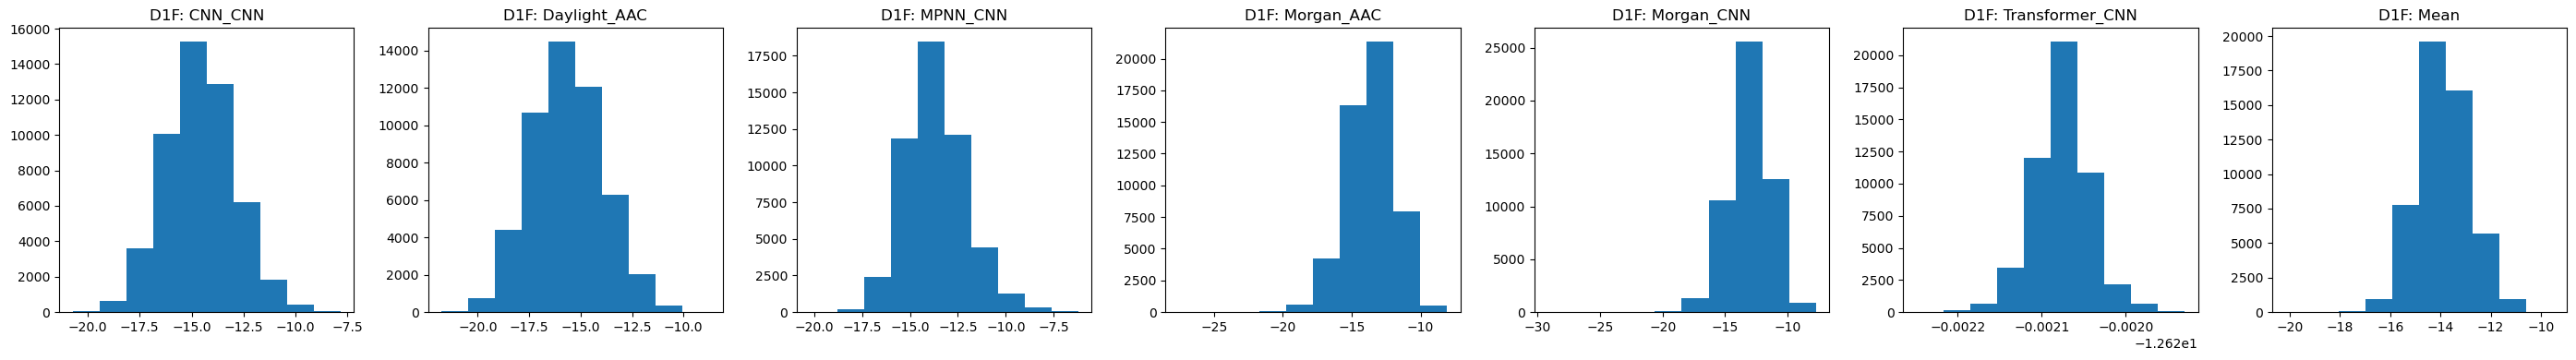

In [17]:
fig,ax = plt.subplots(1,pred_mean.shape[1]-1, figsize=(4*(pred_mean.shape[1]-1),4))

[pred_mean[x].hist(ax=ax[i], grid=False).set_title('D1F: '+x) for i,x in enumerate(pred_mean.columns[1:])]
fig.tight_layout()

fig.savefig(OUTPUT_FILE3)

In [18]:
!TZ=US/Eastern date

Sat Apr 12 22:45:52 EDT 2025
